In [1]:
!pip install nltk textblob
import nltk
from textblob import TextBlob
nltk.download("punkt")   # tokenizer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
import pandas as pd

data = {
    "Source": ["Amazon", "Amazon", "Twitter", "Twitter", "News", "News"],
    "Text": [
        "The phone quality is amazing, battery lasts long!",
        "Worst purchase ever. Completely useless and waste of money.",
        "I love this new update, works so smoothly!",
        "This app crashes every time, really frustrating.",
        "Government announces new policy to support startups.",
        "Stock market crashes, investors worried about future."
    ]
}

df = pd.DataFrame(data)
df.to_csv("sentiment_dataset.csv", index=False)
df


,Source,Text
0,Amazon,"The phone quality is amazing, battery lasts long!"
1,Amazon,Worst purchase ever. Completely useless and wa...
2,Twitter,"I love this new update, works so smoothly!"
3,Twitter,"This app crashes every time, really frustrating."
4,News,Government announces new policy to support sta...
5,News,"Stock market crashes, investors worried about ..."


In [3]:
def get_sentiment(text):
    analysis = TextBlob(text).sentiment
    if analysis.polarity > 0:
        return "Positive"
    elif analysis.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["Text"].apply(get_sentiment)
df


,Source,Text,Sentiment
0,Amazon,"The phone quality is amazing, battery lasts long!",Positive
1,Amazon,Worst purchase ever. Completely useless and wa...,Negative
2,Twitter,"I love this new update, works so smoothly!",Positive
3,Twitter,"This app crashes every time, really frustrating.",Negative
4,News,Government announces new policy to support sta...,Positive
5,News,"Stock market crashes, investors worried about ...",Neutral


In [4]:
emotion_lexicon = {
    "joy": ["love", "amazing", "smoothly", "support"],
    "anger": ["worst", "useless", "crashes", "frustrating"],
    "fear": ["worried", "crashes", "future"],
    "trust": ["policy", "support", "startups"]
}

def detect_emotion(text):
    text = text.lower()
    for emotion, keywords in emotion_lexicon.items():
        for word in keywords:
            if word in text:
                return emotion.capitalize()
    return "Neutral"

df["Emotion"] = df["Text"].apply(detect_emotion)
df


,Source,Text,Sentiment,Emotion
0,Amazon,"The phone quality is amazing, battery lasts long!",Positive,Joy
1,Amazon,Worst purchase ever. Completely useless and wa...,Negative,Anger
2,Twitter,"I love this new update, works so smoothly!",Positive,Joy
3,Twitter,"This app crashes every time, really frustrating.",Negative,Anger
4,News,Government announces new policy to support sta...,Positive,Joy
5,News,"Stock market crashes, investors worried about ...",Neutral,Anger


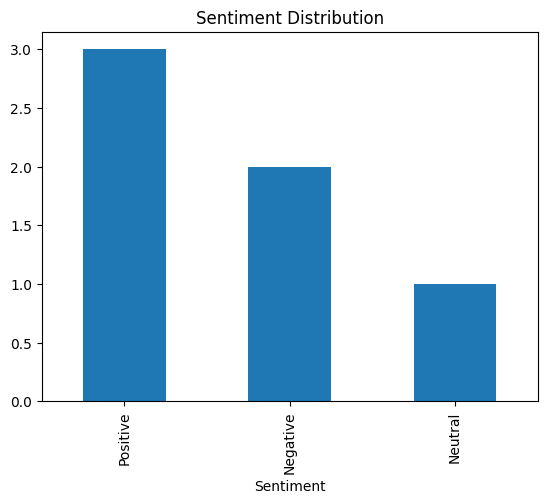

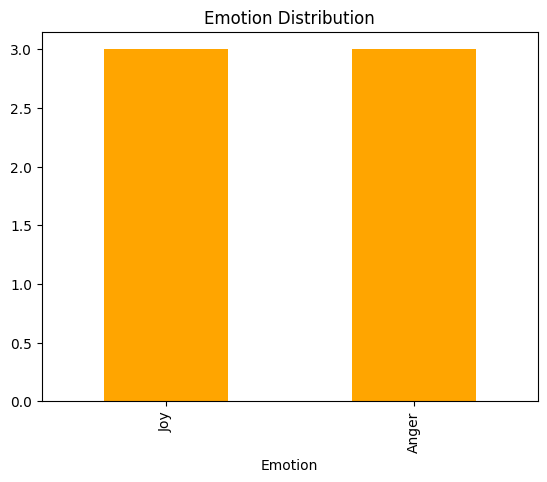

In [5]:
import matplotlib.pyplot as plt

df["Sentiment"].value_counts().plot(kind="bar", title="Sentiment Distribution")
plt.show()

df["Emotion"].value_counts().plot(kind="bar", title="Emotion Distribution", color="orange")
plt.show()


In [6]:
df.to_csv("sentiment_results.csv", index=False)


In [7]:
from google.colab import files
files.download("sentiment_results.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>